<a href="https://colab.research.google.com/github/JoelMuhanguzi/deeplearningcoursework/blob/main/deeplearningcoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://www.dropbox.com/s/ogaa55azkt1fhbt/deep_learning_project.zip?dl=0"

--2022-08-18 09:15:00--  https://www.dropbox.com/s/ogaa55azkt1fhbt/deep_learning_project.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ogaa55azkt1fhbt/deep_learning_project.zip [following]
--2022-08-18 09:15:00--  https://www.dropbox.com/s/raw/ogaa55azkt1fhbt/deep_learning_project.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9325f897bf376e8200a44b0a4a.dl.dropboxusercontent.com/cd/0/inline/BrOm818aOhwYIeIHOgo3JzO3k_7_5Mg-2xQ0rgaGSNHtD2NXR8b46gDPVxkUlAuO4mQtA9oGuksgiF5e6A2K0BZbkoUN0FELHNAvGGTtcjigOYeU7X3ZUOYGg-IU1J6Fw_7rXC-8lsgRvzW30No0mVISt-tXCmljGkKlczMkFDo0tg/file# [following]
--2022-08-18 09:15:00--  https://uc9325f897bf376e8200a44b0a4a.dl.dropboxusercontent.com/cd/0/inline/BrOm818aOhwYIeIHOgo3JzO3

In [ ]:
!unzip deep_learning_project.zip\?dl\=0

In [6]:
import os
import shutil
import glob

In [ ]:
!pwd

In [ ]:
cd /content/deep_learning_project

In [11]:
!mkdir dataset

In [12]:
cd dataset

/content/deep_learning_project/dataset


In [13]:
!mkdir normal sick

In [14]:
def sort_imgs():
    normal_dir = r"/content/deep_learning_project/dataset/normal"
    sick_dir = r"/content/deep_learning_project/dataset/sick"
    known_images = r"/content/deep_learning_project/dataset1/known_images"
    for jpgfile in glob.iglob(os.path.join(known_images, "*.png")):
        if "normal" in jpgfile:
            print(jpgfile)
            shutil.copy(jpgfile, normal_dir)

        elif "sick" in jpgfile:
            print(jpgfile)
            shutil.copy(jpgfile, sick_dir)

        else:
            print("unknown")
            pass

In [15]:
sort_imgs()

/content/deep_learning_project/dataset1/known_images/normal_54.png
/content/deep_learning_project/dataset1/known_images/sick_130.png
/content/deep_learning_project/dataset1/known_images/normal_3.png
/content/deep_learning_project/dataset1/known_images/sick_181.png
/content/deep_learning_project/dataset1/known_images/sick_35.png
/content/deep_learning_project/dataset1/known_images/sick_111.png
/content/deep_learning_project/dataset1/known_images/sick_8.png
/content/deep_learning_project/dataset1/known_images/sick_112.png
/content/deep_learning_project/dataset1/known_images/normal_207.png
/content/deep_learning_project/dataset1/known_images/normal_77.png
/content/deep_learning_project/dataset1/known_images/sick_252.png
/content/deep_learning_project/dataset1/known_images/sick_143.png
/content/deep_learning_project/dataset1/known_images/sick_124.png
/content/deep_learning_project/dataset1/known_images/sick_362.png
/content/deep_learning_project/dataset1/known_images/normal_246.png
/conten

In [16]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import splitfolders
input_folder = r"/content/deep_learning_project/dataset"
output = r"/content/deep_learning_project/dataset_split"

splitfolders.ratio(input_folder, output, seed=42, ratio=(0.7, 0.2, 0.1))

Copying files: 715 files [00:00, 3456.45 files/s]


In [18]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [19]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/deep_learning_project/dataset_split'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


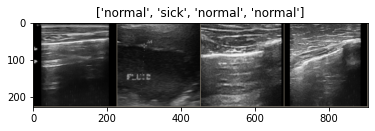

In [20]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [21]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [22]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [23]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [24]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6266 Acc: 0.7174
val Loss: 0.2206 Acc: 0.9577

Epoch 1/24
----------
train Loss: 0.5297 Acc: 0.7735
val Loss: 0.2231 Acc: 0.8944

Epoch 2/24
----------
train Loss: 0.5362 Acc: 0.7976
val Loss: 0.2027 Acc: 0.9366

Epoch 3/24
----------
train Loss: 0.5346 Acc: 0.7936
val Loss: 0.2080 Acc: 0.9085

Epoch 4/24
----------
train Loss: 0.5341 Acc: 0.7896
val Loss: 0.2177 Acc: 0.9507

Epoch 5/24
----------
train Loss: 0.4555 Acc: 0.8377
val Loss: 0.9964 Acc: 0.6620

Epoch 6/24
----------
train Loss: 0.4904 Acc: 0.8216
val Loss: 0.0879 Acc: 0.9718

Epoch 7/24
----------
train Loss: 0.3103 Acc: 0.8778
val Loss: 0.1078 Acc: 0.9648

Epoch 8/24
----------
train Loss: 0.3525 Acc: 0.8577
val Loss: 0.1485 Acc: 0.9366

Epoch 9/24
----------
train Loss: 0.3267 Acc: 0.8657
val Loss: 0.1005 Acc: 0.9718

Epoch 10/24
----------
train Loss: 0.2791 Acc: 0.8958
val Loss: 0.0771 Acc: 0.9789

Epoch 11/24
----------
train Loss: 0.3422 Acc: 0.8517
val Loss: 0.0919 Acc: 0.9718

Ep

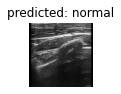

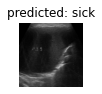

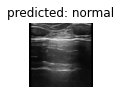

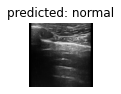

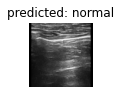

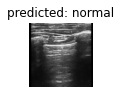

In [25]:
visualize_model(model_ft)

In [26]:
print(model_ft.state_dict())

OrderedDict([('conv1.weight', tensor([[[[ 6.7386e-03,  1.1088e-02,  1.6311e-02,  ...,  7.5209e-02,
            3.1989e-02,  1.3722e-03],
          [ 2.1756e-02,  2.0880e-02, -9.7668e-02,  ..., -2.5725e-01,
           -1.1838e-01,  1.4104e-02],
          [ 1.1759e-03,  6.8035e-02,  3.0499e-01,  ...,  5.3155e-01,
            2.6383e-01,  7.0228e-02],
          ...,
          [-2.6599e-02,  1.8843e-02,  7.6263e-02,  ..., -3.2788e-01,
           -4.2052e-01, -2.5831e-01],
          [ 2.5556e-02,  3.7639e-02,  6.1468e-02,  ...,  4.1421e-01,
            3.8923e-01,  1.6157e-01],
          [-1.8209e-02, -6.3611e-03, -2.5778e-02,  ..., -1.4925e-01,
           -8.5714e-02, -9.4411e-03]],

         [[ 5.6582e-03, -9.4873e-03, -1.6592e-02,  ...,  5.1064e-02,
            1.5688e-02, -1.1577e-02],
          [ 5.6504e-02,  4.5097e-02, -9.2107e-02,  ..., -2.9836e-01,
           -1.4943e-01,  9.4571e-03],
          [ 7.3688e-03,  1.0745e-01,  4.1171e-01,  ...,  7.1985e-01,
            3.7669e-01,  1.3

In [31]:
PATH = "/content/deep_learning_project/model2.pt"
torch.save(model_ft, PATH)

In [32]:
model = torch.load(PATH)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [81]:
from PIL import Image, ImageOps
import pandas as pd

model = torch.load(PATH)

model.eval()  # Set to eval mode to change behavior of Dropout, BatchNorm

transform = transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

classes = ["normal", "sick"]

lst = []
lst2 = []

unknown_images = "/content/deep_learning_project/dataset1/unknown_images"

for jpgfile in glob.iglob(os.path.join(unknown_images, "*.png")):

  img = Image.open(jpgfile)  # Load image as PIL.Image
  
  filename = os.path.basename(jpgfile)

  img = img.convert("RGB")
  x = transform(img)

  x = x.unsqueeze(0)  # Add batch dimension

  output = model(x)  # Forward pass
  pred = torch.argmax(output.data, 1)  # Get predicted class if multi-class classification

  lst.append(filename)
  lst2.append(classes[pred.item()])
  print(filename, classes[pred.item()])

df = pd.DataFrame({"files":lst,
                   "predictions":lst2})
print(df)
df.to_csv('.csv')


[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from PIL import Image, ImageOps
import pandas as pd

model = torch.load(PATH)

model.eval()  # Set to eval mode to change behavior of Dropout, BatchNorm

transform = transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

classes = ["normal", "sick"]

lst3 = []

unknown_images = "/content/deep_learning_project/dataset2/images"
for jpgfile in glob.iglob(os.path.join(unknown_images, "*.png")):
  img = Image.open(jpgfile)  # Load image as PIL.Image
  
  filename = os.path.basename(jpgfile)

  img = img.convert("RGB")
  x = transform(img)
  x = x.unsqueeze(0)  # Add batch dimension

  output = model(x)  # Forward pass
  pred = torch.argmax(output.data, 1)  # Get predicted class if multi-class classification

  lst3.append(pred.item())

print(lst3)

In [83]:
data = pd.read_csv("/content/deep_learning_project/dataset2/image_classes.csv")
y_true = data["diagnosis (0-Normal, 1-Sick)"].values.tolist()
y_pred = lst3

print(ds)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [85]:
import sklearn.metrics
import numpy

r = sklearn.metrics.confusion_matrix(y_true, y_pred)

r = numpy.flip(r)

acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)

print(acc)

0.5089285714285714


In [89]:
precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label= 1)
print(precision)

0.5048076923076923


In [90]:
recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label= 1)
print(recall)

0.9375
